In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = "../loss-stats"
files = os.listdir(data_path)

In [3]:
features = [5, 10, 15]
contexts = [5, 10, 15]

# Extract data from .csv files

stats = {
    str(f):{str(c):None for c in contexts} for f in features
}

for f in features:
    for c in contexts:
        fname = f"{f}-feature_embedding_model_context_{c}.csv"
        fpath = os.path.join(data_path, fname)
        df = pd.read_csv(fpath)
        stats[str(f)][str(c)] = df

print(stats.keys())

dict_keys(['5', '10', '15'])


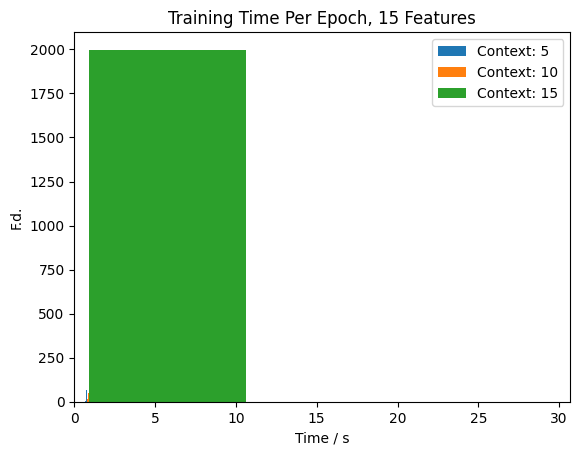

In [7]:
# Effect of context size for fixed feature no.

def epoch_time_plot(features):
    for c in contexts:
        times = stats[str(features)][str(c)]["Time"]
        xmax = np.mean(times) + 3*np.std(times)
        plt.hist(times, label=f"Context: {c}", bins=int(np.sqrt(len(times))))
        plt.legend()
        plt.xlim(0,xmax)
        plt.title(f"Training Time Per Epoch, {features} Features")
        plt.xlabel("Time / s")
        plt.ylabel("F.d.")

    plt.show()


epoch_time_plot("15")

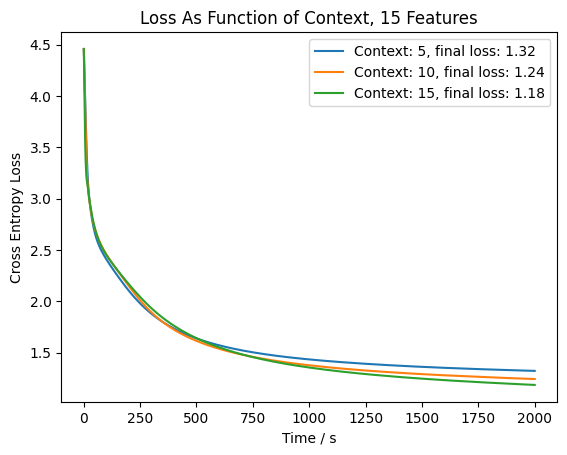

In [5]:
def loss_plots_context(features):
    for c in contexts:
        epochs = stats[str(features)][str(c)]["Epoch"]
        loss = stats[str(features)][str(c)]["Loss"]

        f_loss = loss.iloc[-1]

        plt.plot(epochs, loss, label=f"Context: {c}, final loss: {f_loss:.2f}")
        plt.legend()
        plt.title(f"Loss As Function of Context, {features} Features")
        plt.xlabel("Time / s")
        plt.ylabel("Cross Entropy Loss")
    plt.show()



loss_plots_context("15")

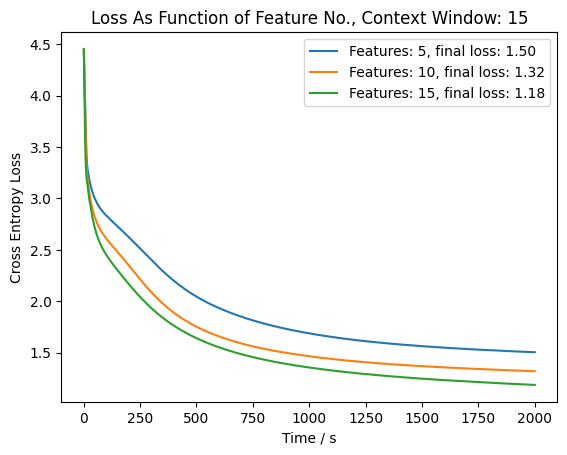

In [6]:
def loss_plots_features(context):

    for f in features:
        epochs = stats[str(f)][str(context)]["Epoch"]
        loss = stats[str(f)][str(context)]["Loss"]

        f_loss = loss.iloc[-1]

        plt.plot(epochs, loss, label=f"Features: {f}, final loss: {f_loss:.2f}")
        plt.legend()
        plt.title(f"Loss As Function of Feature No., Context Window: {context}")
        plt.xlabel("Time / s")
        plt.ylabel("Cross Entropy Loss")
    plt.show()


loss_plots_features("15")